<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate a decision tree model and a random forest model for classification tasks.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q1.1.** Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.

> **Q1.2.** Evaluate and discuss the model performance.

> **Q1.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q1.4.** Evaluate and discuss the model performance after the pruning.

> **Q1.5.** Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.

> **Q1.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q1.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q1.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [3]:
# Read data set

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [4]:

def fillNullValues(df, column):
    
    random_sample = df[column].dropna().sample(df[column].isnull().sum(),random_state=0)
    random_sample.index=df[df[column].isnull()].index
    df.loc[df[column].isnull(),column]=random_sample 

In [5]:
columnname =df.columns
for name in columnname:
    if df[name].isnull().sum():
        fillNullValues(df, name)

In [6]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36881 non-null  float64
 3   MaxTemp        36881 non-null  float64
 4   Rainfall       36881 non-null  float64
 5   Evaporation    36881 non-null  float64
 6   Sunshine       36881 non-null  float64
 7   WindGustDir    36881 non-null  object 
 8   WindGustSpeed  36881 non-null  float64
 9   WindDir9am     36881 non-null  object 
 10  WindDir3pm     36881 non-null  object 
 11  WindSpeed9am   36881 non-null  float64
 12  WindSpeed3pm   36881 non-null  float64
 13  Humidity9am    36881 non-null  float64
 14  Humidity3pm    36881 non-null  float64
 15  Pressure9am    36881 non-null  float64
 16  Pressure3pm    36881 non-null  float64
 17  Cloud9am       36881 non-null  float64
 18  Cloud3

In [8]:
numerical_feature = [feature for feature in df.columns if (df[feature].dtypes != 'O'and df[feature].dtypes != 'datetime64[ns]')]
categorical_feature = [feature for feature in df.columns if (feature not in numerical_feature and df[feature].dtypes != 'datetime64[ns]')] 

In [9]:
df_set =df.iloc[:,2:]
df_set2 =df.iloc[:,2:]
df_set.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,7.0,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,1.1,14.5,0.4,7.0,11.9,SSW,50.0,E,SW,7.0,...,46.0,1001.5,1002.4,7.0,7.0,1.3,13.7,No,0.0,No
2,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,19.0,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,28.0,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,14.6,25.3,0.0,9.6,3.8,NNW,43.0,WNW,N,6.0,...,67.0,1020.3,1015.0,1.0,0.0,22.2,22.6,No,0.4,No


In [10]:
numerical_feature2 = [feature for feature in df_set.columns if (df_set[feature].dtypes != 'O'and df_set[feature].dtypes != 'datetime64[ns]')]
categorical_feature2 = [feature for feature in df_set.columns if (feature not in numerical_feature and df_set[feature].dtypes != 'datetime64[ns]')] 

In [11]:
categorical_feature2 

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [17]:
for name in categorical_feature2:
    df_set[name] =df_set[name].astype('category').cat.codes
    df_set2[name] =df_set2[name].astype('category').cat.codes

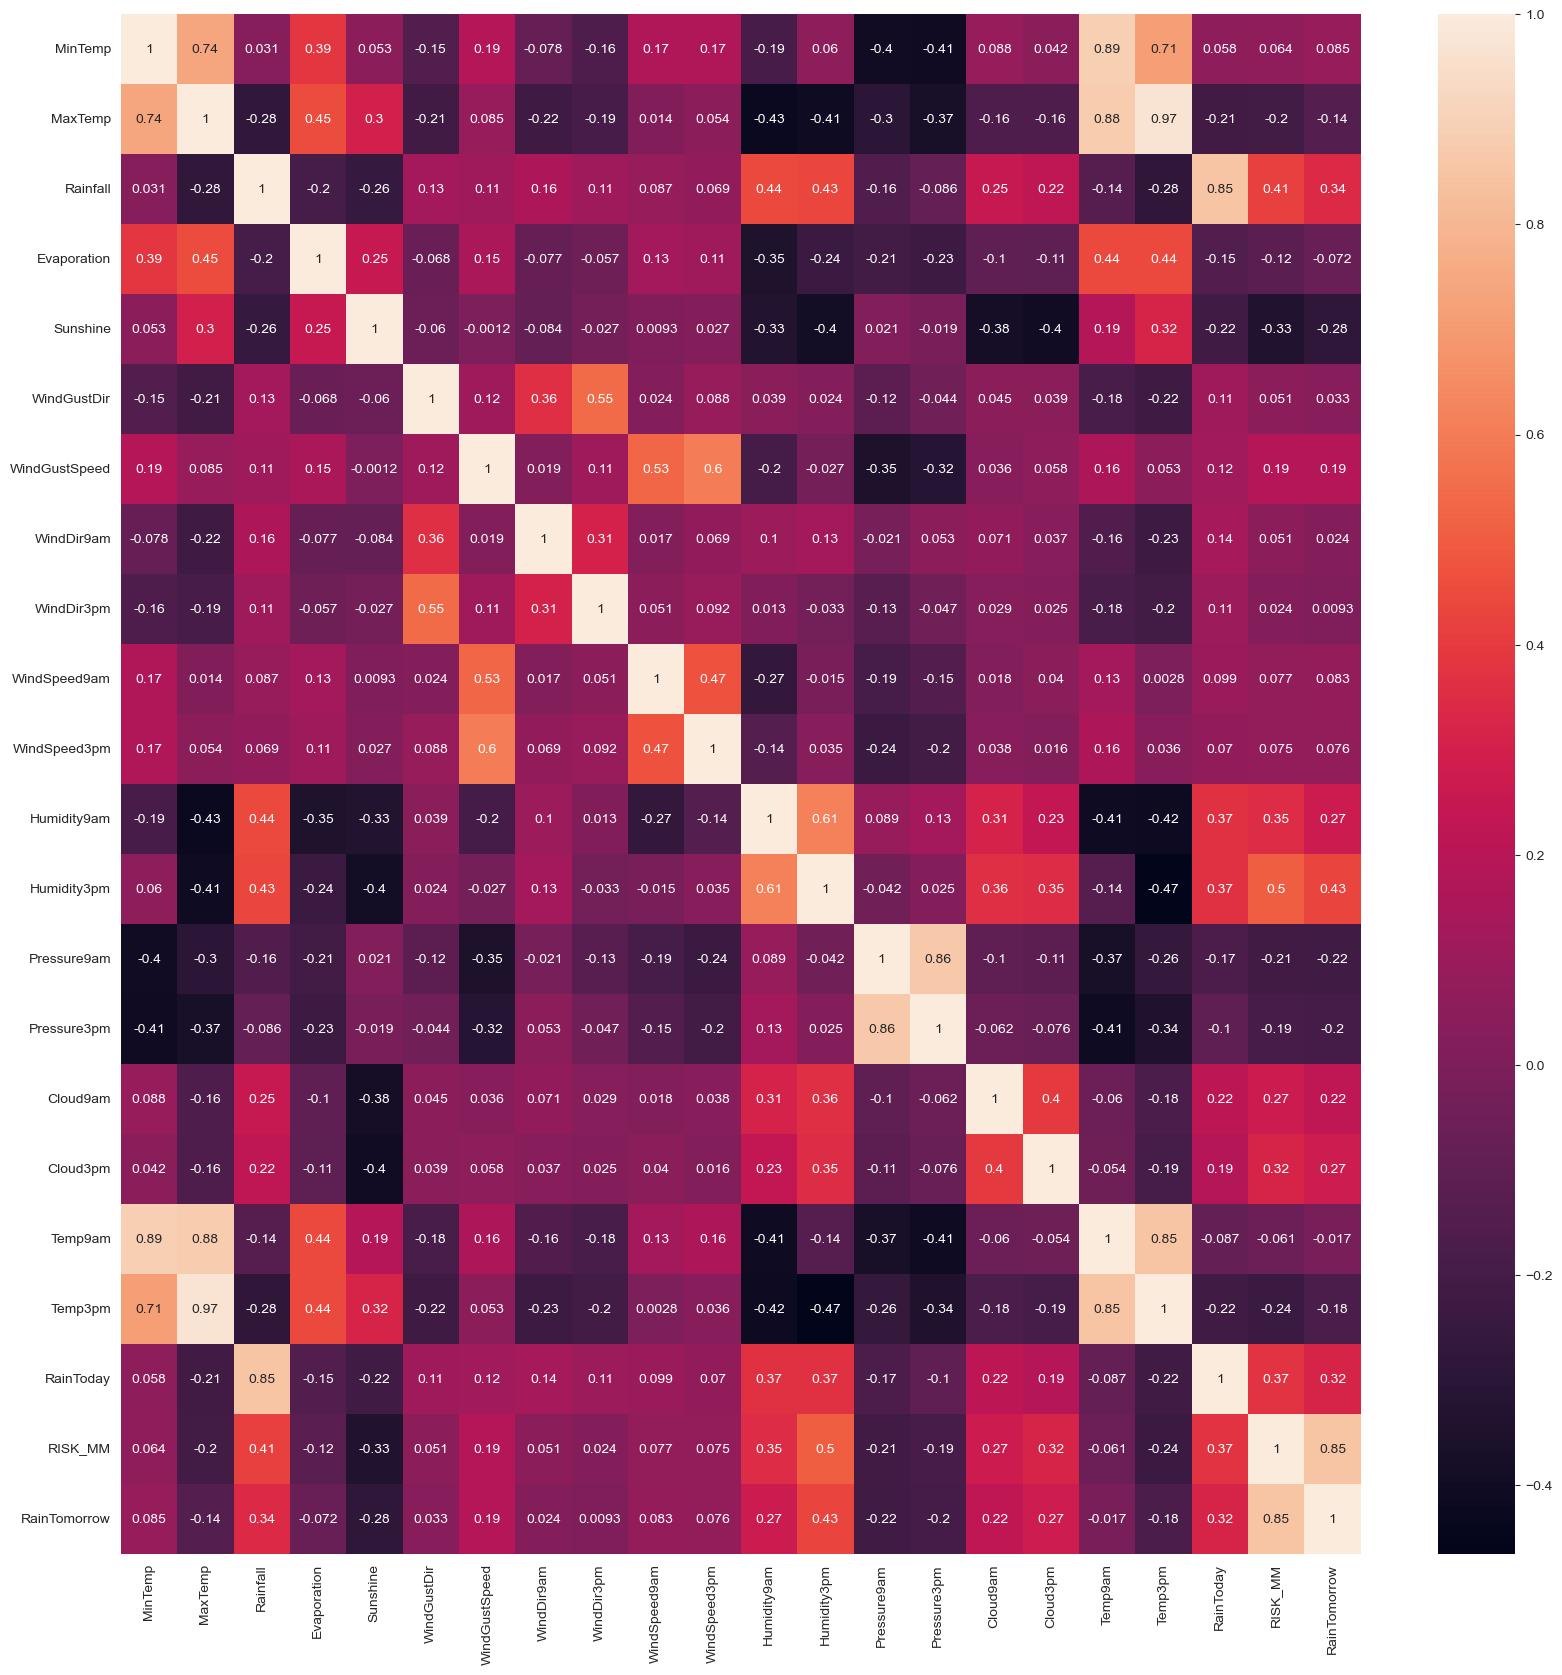

In [18]:
corrmat = df_set.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [19]:
y= df_set2['RainTomorrow'].values
X =df_set2.drop(['RainTomorrow'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5.1,14.3,0.0,1.8,8.9,7,30.0,15,10,7.0,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0,0.0
1,1.1,14.5,0.4,7.0,11.9,11,50.0,0,12,7.0,...,99.0,46.0,1001.5,1002.4,7.0,7.0,1.3,13.7,0,0.0
2,19.7,26.2,0.0,7.2,7.2,10,41.0,10,10,19.0,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0,0.2
3,16.6,28.0,0.0,9.0,11.3,12,54.0,10,12,28.0,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0,0.0
4,14.6,25.3,0.0,9.6,3.8,6,43.0,14,3,6.0,...,64.0,67.0,1020.3,1015.0,1.0,0.0,22.2,22.6,0,0.4


In [21]:
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(0.5, 0.75, 'RISK_MM <= 1.1\ngini = 0.359\nsamples = 29504\nvalue = [22578, 6926]\nclass = No RT'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 22578\nvalue = [22578, 0]\nclass = No RT'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6926\nvalue = [0, 6926]\nclass = Yes RT')]

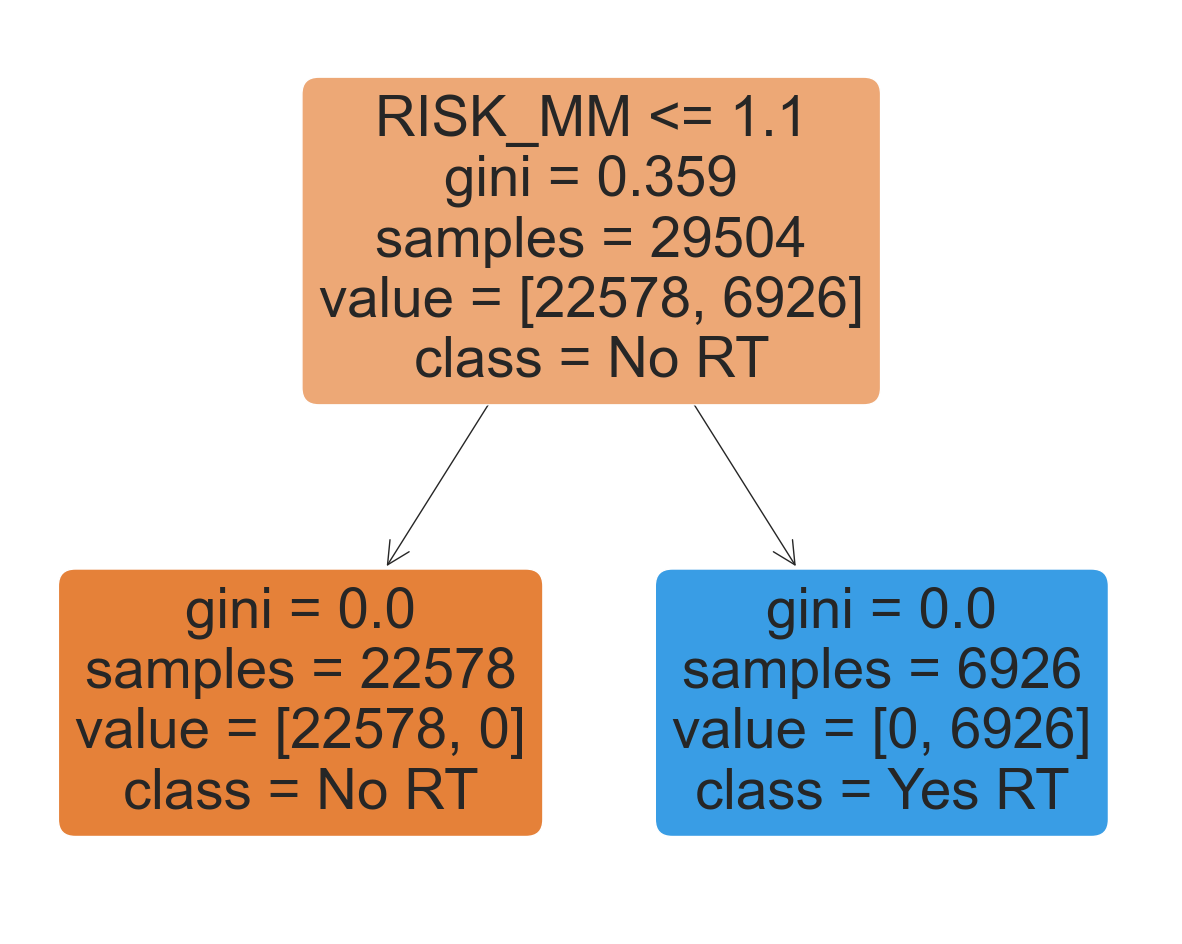

In [22]:
plt.figure(figsize=(15, 12))
plot_tree(dt_clf, 
          filled=True, 
          rounded=True, 
          class_names=["No RT", "Yes RT"], 
          feature_names=X.columns.tolist())

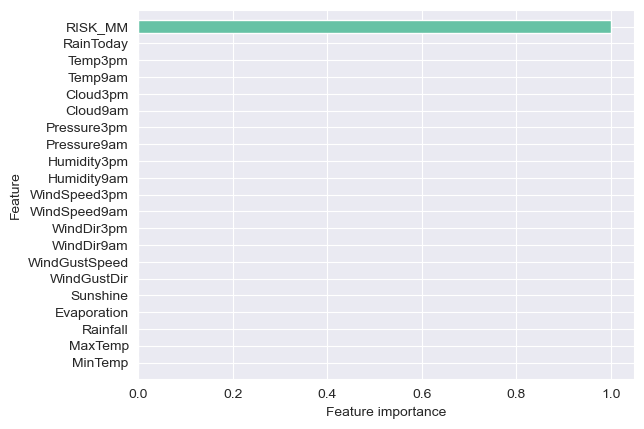

In [23]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(dt_clf)

### Analysis
we see form the data that the decision tree model is only at one level and the the RISK_MM feature is the only important feature that the model makes decision from. This makes the model very unrealiable. if presented with a data set that don't have this feature, the model will generate inaccurate result. In order to make this model more robust, we will drop this feature and use the new that set to train the model

In [24]:
y= df_set['RainTomorrow'].values
X =df_set.drop(['RainTomorrow'], axis =1)
X.pop('RISK_MM')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,5.1,14.3,0.0,1.8,8.9,7,30.0,15,10,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0
1,1.1,14.5,0.4,7.0,11.9,11,50.0,0,12,7.0,24.0,99.0,46.0,1001.5,1002.4,7.0,7.0,1.3,13.7,0
2,19.7,26.2,0.0,7.2,7.2,10,41.0,10,10,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0
3,16.6,28.0,0.0,9.0,11.3,12,54.0,10,12,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0
4,14.6,25.3,0.0,9.6,3.8,6,43.0,14,3,6.0,28.0,64.0,67.0,1020.3,1015.0,1.0,0.0,22.2,22.6,0


In [26]:
# Normalizing the independent variables: Makes the convergence faster
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0))

In [27]:
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf = dt_clf.fit(X_train, y_train)

In [28]:
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

[Text(0.6870266235388773, 0.9827586206896551, 'Humidity3pm <= 0.712\ngini = 0.359\nsamples = 29504\nvalue = [22578, 6926]\nclass = No RT'),
 Text(0.4785937554956972, 0.9482758620689655, 'Humidity3pm <= 0.581\ngini = 0.258\nsamples = 24253\nvalue = [20563, 3690]\nclass = No RT'),
 Text(0.3200536206019767, 0.9137931034482759, 'WindGustSpeed <= 0.359\ngini = 0.188\nsamples = 18056\nvalue = [16155, 1901]\nclass = No RT'),
 Text(0.2075596338107018, 0.8793103448275862, 'Sunshine <= 0.64\ngini = 0.151\nsamples = 15411\nvalue = [14146, 1265]\nclass = No RT'),
 Text(0.12555741025160036, 0.8448275862068966, 'Pressure3pm <= 0.588\ngini = 0.216\nsamples = 7074\nvalue = [6201, 873]\nclass = No RT'),
 Text(0.058814805261800364, 0.8103448275862069, 'Humidity3pm <= 0.399\ngini = 0.304\nsamples = 2974\nvalue = [2417, 557]\nclass = No RT'),
 Text(0.02235180669214716, 0.7758620689655172, 'WindDir3pm <= 0.5\ngini = 0.213\nsamples = 1257\nvalue = [1105, 152]\nclass = No RT'),
 Text(0.009681220249958966, 0.

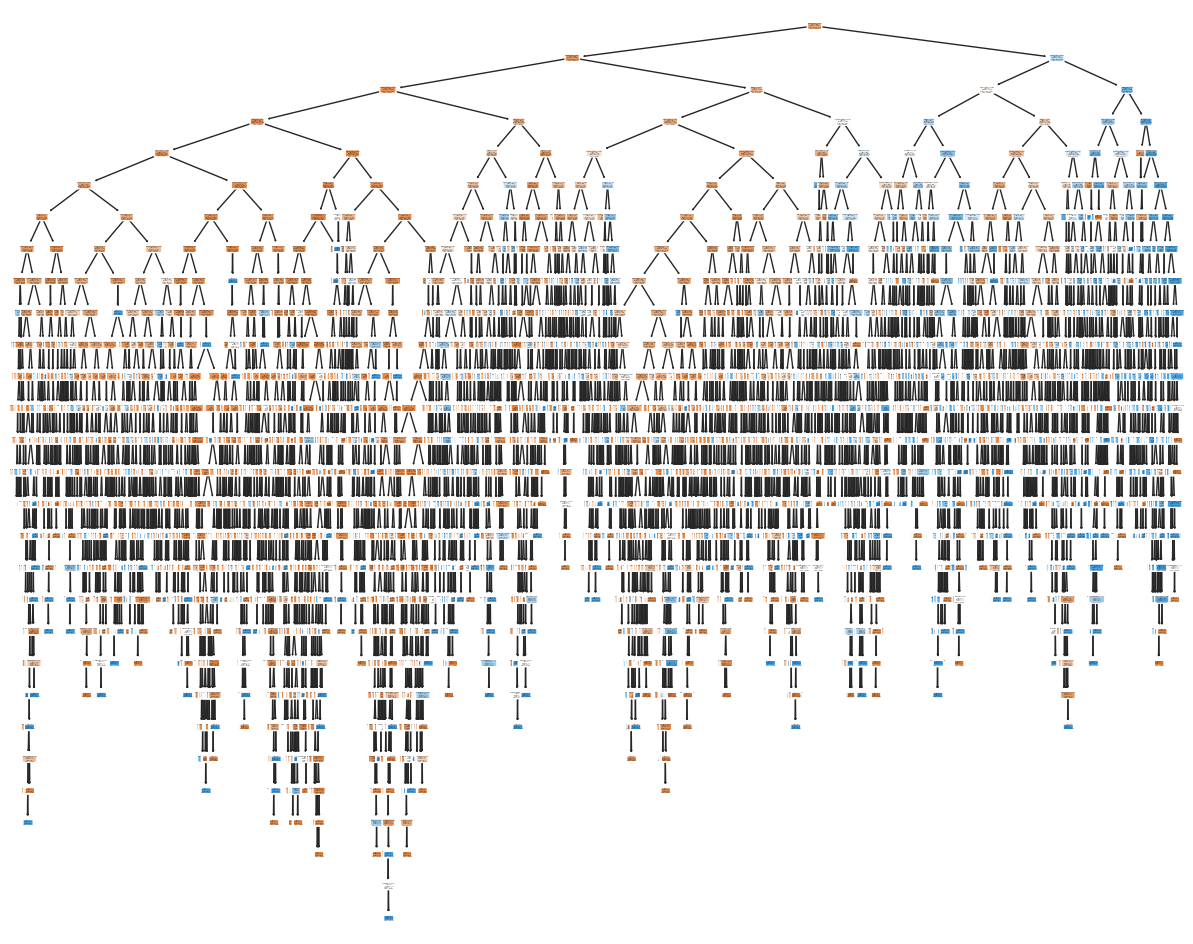

In [96]:
plt.figure(figsize=(15, 12))
plot_tree(dt_clf, 
          filled=True, 
          rounded=True, 
          class_names=["No RT", "Yes RT"], 
          feature_names=X.columns.tolist())

In [94]:
dt_clf.feature_importances_

array([0.03880544, 0.03790912, 0.04797909, 0.04055449, 0.05953863,
       0.0333176 , 0.05667203, 0.03239575, 0.03018891, 0.03303298,
       0.03446489, 0.04565883, 0.27179624, 0.0405882 , 0.07204953,
       0.022474  , 0.02656085, 0.03377953, 0.03805198, 0.00418192])

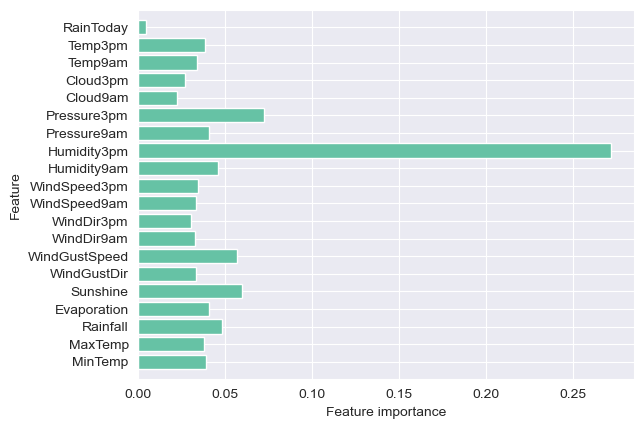

In [95]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(dt_clf)

## Note
To futher simplifiy the model, we will use the following features to train the models 
- Humidity3pm
- WindGustSpeed
- Sunshine
- Rainfall
- Pressure3pm
- Temp3pm


In [36]:
X= X[['Humidity3pm','WindGustSpeed','Sunshine', 'Rainfall','Pressure3pm','Temp3pm']]
X.head()

,Humidity3pm,WindGustSpeed,Sunshine,Rainfall,Pressure3pm,Temp3pm
0,47.0,30.0,8.9,0.0,1022.2,13.3
1,46.0,50.0,11.9,0.4,1002.4,13.7
2,50.0,41.0,7.2,0.0,1021.9,24.4
3,41.0,54.0,11.3,0.0,1014.9,26.1
4,67.0,43.0,3.8,0.0,1015.0,22.6


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf = dt_clf.fit(X_train, y_train)

In [41]:
X.columns

Index(['Humidity3pm', 'WindGustSpeed', 'Sunshine', 'Rainfall', 'Pressure3pm',
       'Temp3pm'],
      dtype='object')

[Text(0.6863019039609936, 0.984375, 'Humidity3pm <= 71.5\ngini = 0.359\nsamples = 29504\nvalue = [22578, 6926]\nclass = No RT'),
 Text(0.478339745934824, 0.953125, 'Humidity3pm <= 58.5\ngini = 0.258\nsamples = 24253\nvalue = [20563, 3690]\nclass = No RT'),
 Text(0.31795587732696173, 0.921875, 'WindGustSpeed <= 53.0\ngini = 0.188\nsamples = 18056\nvalue = [16155, 1901]\nclass = No RT'),
 Text(0.2042142759879375, 0.890625, 'Sunshine <= 9.15\ngini = 0.151\nsamples = 15411\nvalue = [14146, 1265]\nclass = No RT'),
 Text(0.11704585107131624, 0.859375, 'Pressure3pm <= 1015.15\ngini = 0.216\nsamples = 7074\nvalue = [6201, 873]\nclass = No RT'),
 Text(0.05205000843331753, 0.828125, 'Humidity3pm <= 40.5\ngini = 0.304\nsamples = 2974\nvalue = [2417, 557]\nclass = No RT'),
 Text(0.014261651653841946, 0.796875, 'Humidity3pm <= 26.5\ngini = 0.213\nsamples = 1257\nvalue = [1105, 152]\nclass = No RT'),
 Text(0.003617665293023595, 0.765625, 'Rainfall <= 5.4\ngini = 0.132\nsamples = 438\nvalue = [407, 3

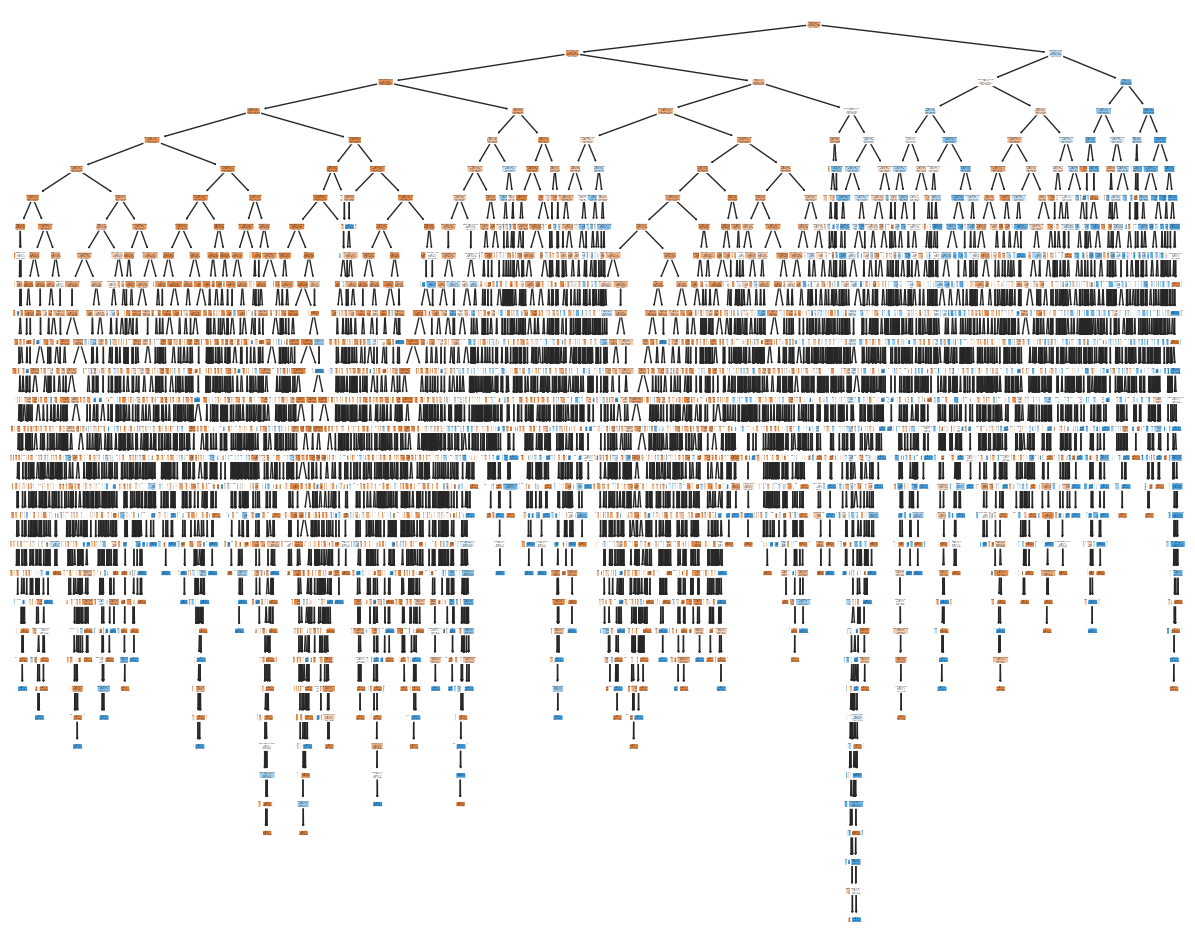

In [42]:
plt.figure(figsize=(15, 12))
plot_tree(dt_clf, 
          filled=True, 
          rounded=True, 
          class_names=["No RT", "Yes RT"], 
          feature_names=X.columns.tolist())

In [43]:
dt_clf.feature_importances_

array([0.31861153, 0.11324185, 0.14010956, 0.08953991, 0.17577873,
       0.16271842])

## Model Evaluation

In [44]:
y_pred = dt_clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7578961637522028

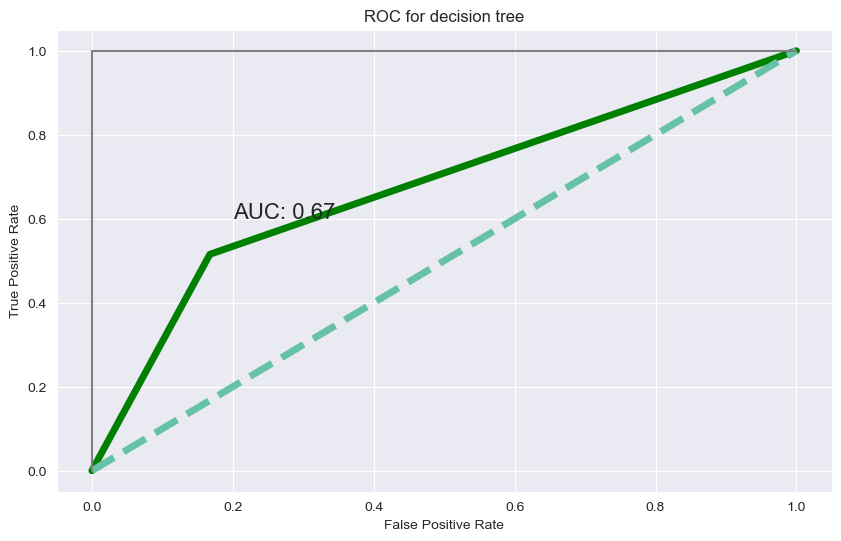

In [47]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

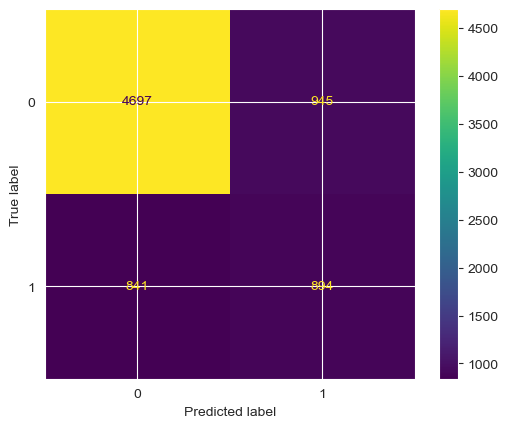

In [48]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_).plot()
plt.show()

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5642
           1       0.49      0.52      0.50      1735

    accuracy                           0.76      7377
   macro avg       0.67      0.67      0.67      7377
weighted avg       0.76      0.76      0.76      7377



In [50]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = dt_clf.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    clf_dts.append(dt_clf)

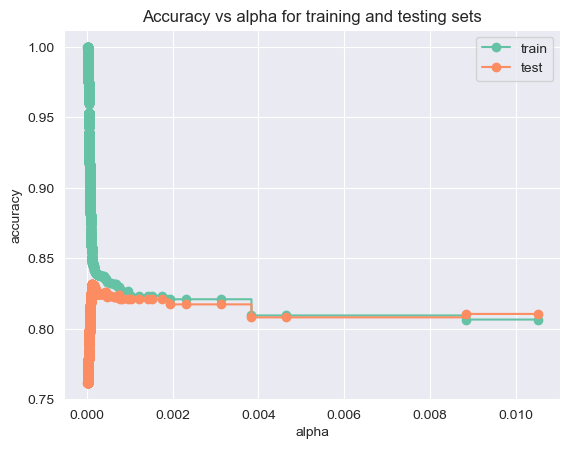

In [51]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in clf_dts]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

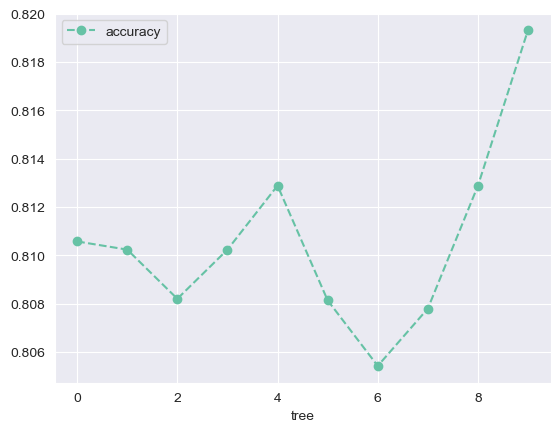

In [52]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0085)

scores = cross_val_score(dt_clf, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

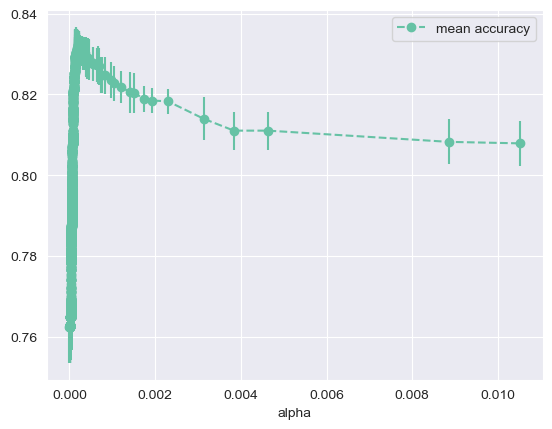

In [53]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [54]:
alpha_results['mean accuracy'].max()

0.8315149015846395

In [55]:
alpha_results['mean accuracy'].idxmax()

1818

In [56]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.00020225229773405094

In [57]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(0.5745833333333333, 0.95, 'Humidity3pm <= 71.5\ngini = 0.359\nsamples = 29504\nvalue = [22578, 6926]\nclass = No RT'),
 Text(0.31916666666666665, 0.85, 'Humidity3pm <= 58.5\ngini = 0.258\nsamples = 24253\nvalue = [20563, 3690]\nclass = No RT'),
 Text(0.15666666666666668, 0.75, 'WindGustSpeed <= 53.0\ngini = 0.188\nsamples = 18056\nvalue = [16155, 1901]\nclass = No RT'),
 Text(0.08666666666666667, 0.65, 'Sunshine <= 9.15\ngini = 0.151\nsamples = 15411\nvalue = [14146, 1265]\nclass = No RT'),
 Text(0.05333333333333334, 0.55, 'Pressure3pm <= 1015.15\ngini = 0.216\nsamples = 7074\nvalue = [6201, 873]\nclass = No RT'),
 Text(0.02666666666666667, 0.45, 'Humidity3pm <= 40.5\ngini = 0.304\nsamples = 2974\nvalue = [2417, 557]\nclass = No RT'),
 Text(0.013333333333333334, 0.35, 'gini = 0.213\nsamples = 1257\nvalue = [1105, 152]\nclass = No RT'),
 Text(0.04, 0.35, 'Sunshine <= 6.85\ngini = 0.36\nsamples = 1717\nvalue = [1312, 405]\nclass = No RT'),
 Text(0.02666666666666667, 0.25, 'Rainfall

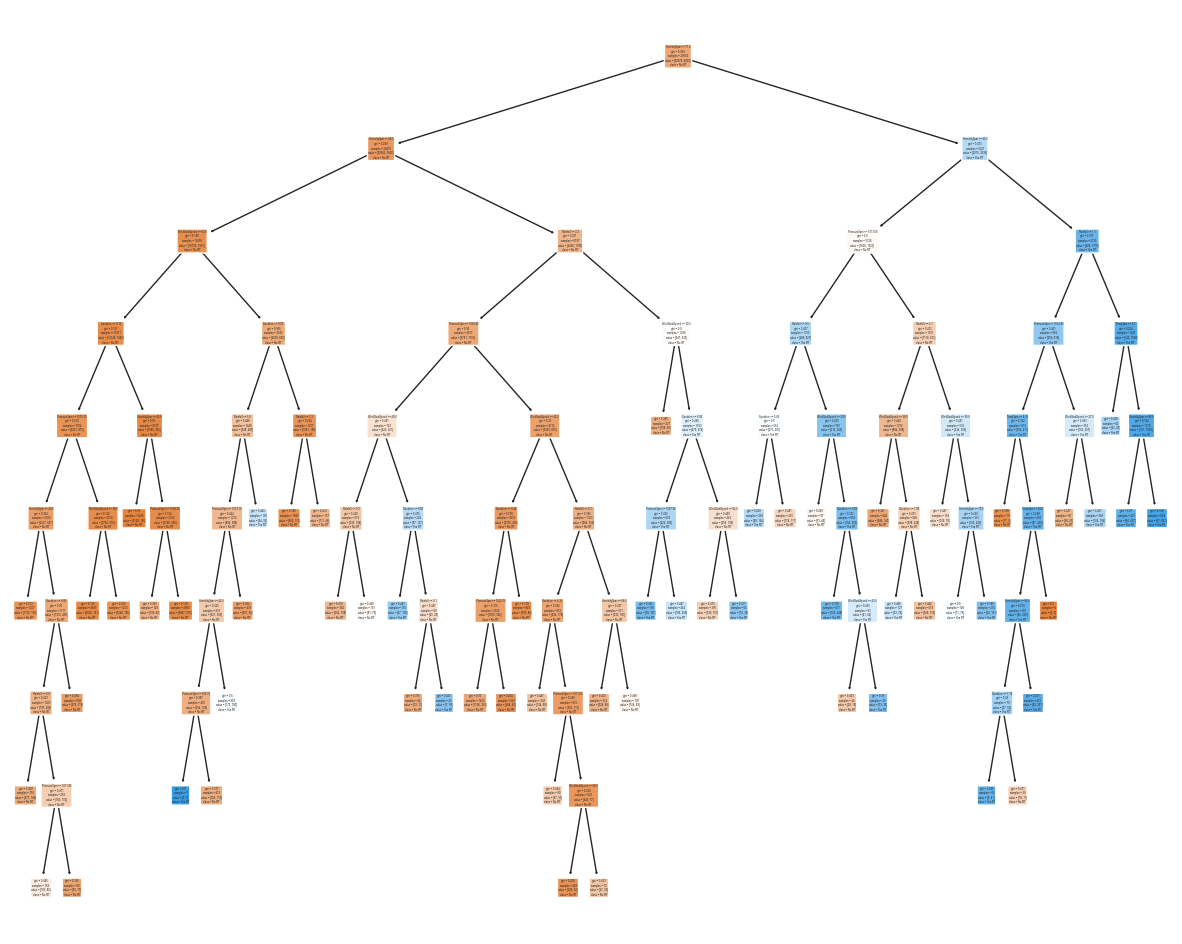

In [60]:
plt.figure(figsize=(15, 12))
plot_tree(dt_clf, 
          filled=True, 
          rounded=True, 
          class_names=["No RT", "Yes RT"], 
          feature_names=X.columns.tolist())

In [62]:
y_pred = dt_clf.predict(X_test)

In [63]:
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [64]:
y_test

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8274366273552934

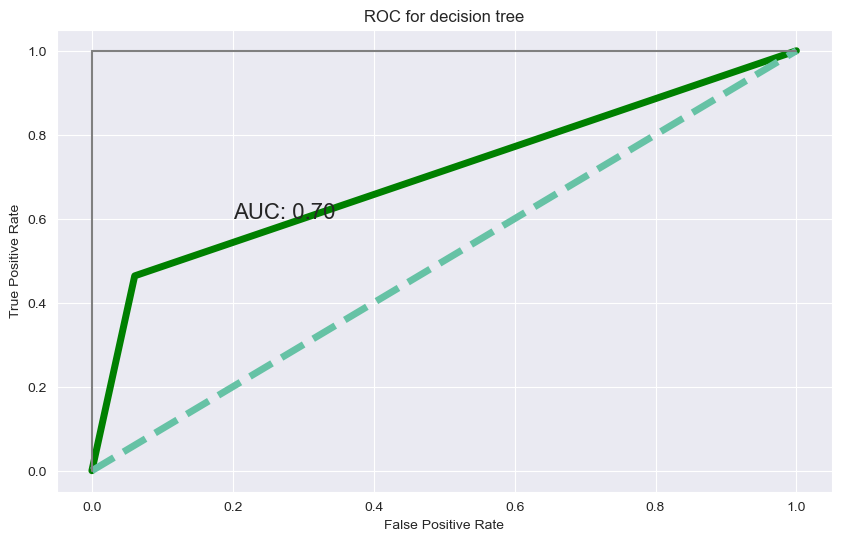

In [66]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7015914502899722

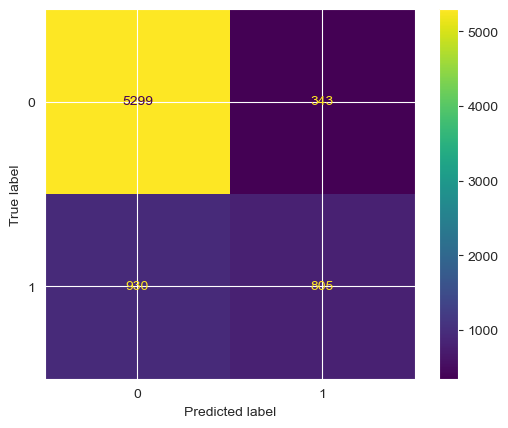

In [70]:
# plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['No RT', 'Yes RT'])
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_).plot()
plt.show()

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5642
           1       0.70      0.46      0.56      1735

    accuracy                           0.83      7377
   macro avg       0.78      0.70      0.73      7377
weighted avg       0.82      0.83      0.81      7377



## Classification Using Random Forests

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred = clf_rf.predict(X_test)

In [74]:
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [75]:
y_test

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8308255388369256

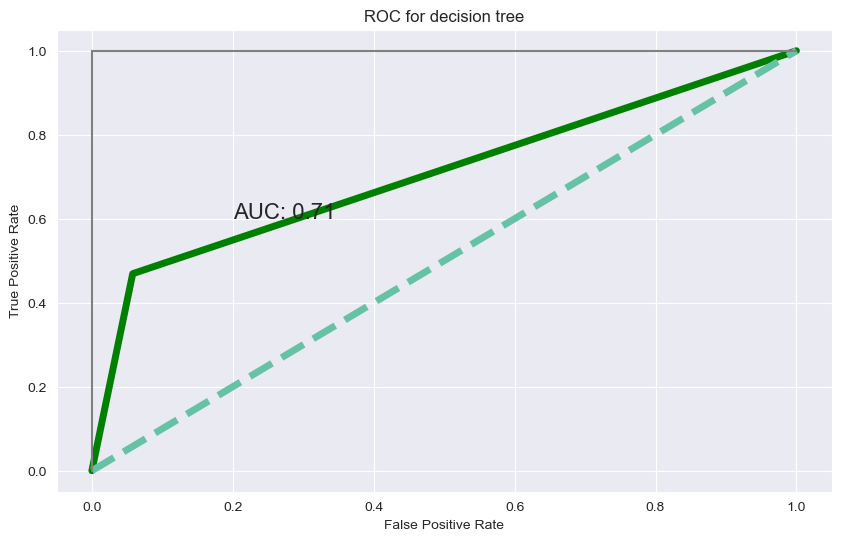

In [77]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [78]:
roc_auc_score(y_test, y_pred)

0.7056030471341431

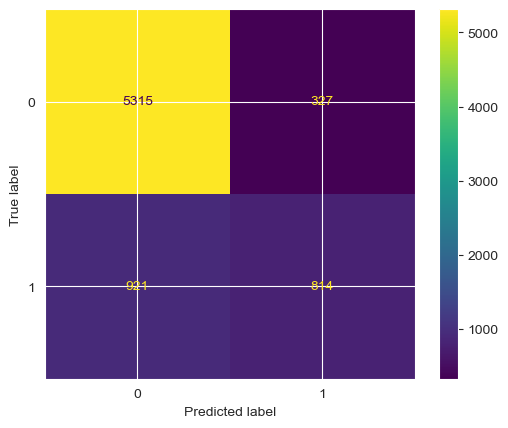

In [80]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_).plot()
plt.show()

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5642
           1       0.71      0.47      0.57      1735

    accuracy                           0.83      7377
   macro avg       0.78      0.71      0.73      7377
weighted avg       0.82      0.83      0.82      7377



In [ ]:
Q1.6. Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

Q1.7. Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab.

Q1.8. Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

### Evaluate and discuss the model performance in contrast to the previous models

Before prunnig the decision tree model we see that the tree has alot of branches and the precision value of the pruned  tree is better than the unprunned model. the pruned model has a slightly better performance than the original model.

### Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest
In comparism to lab2 (binary logicstic regression model) we see that the logistic regression model performs better on  this data set than the decision tree and random forest model.

### Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?
For this case in question, I will pick the logistics regression model because I feel it has more accurate prediction than the order model and also considers all the featurein making its prediction.


# Question 2: Multi-Class Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q2.1.** Build a classification model using Decision Trees to predict the target variable `species` from the dataset.

> **Q2.2.** Evaluate and discuss the model performance.

> **Q2.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q2.4.** Evaluate and discuss the model performance after the pruning.

> **Q2.5.** Build a classification model using Random Forests to predict the target variable `species` from the dataset.

> **Q2.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q2.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q2.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

In [113]:
data = pd.read_csv('penguins.csv')
data.shape

(344, 7)

In [114]:
# get null values in the dataset
data.isnull().sum()
# data['species'].unique()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [121]:
# dealing with null values in the dataset
data = data.dropna()
data.head(200)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,FEMALE
202,Chinstrap,Dream,48.1,16.4,199.0,3325.0,FEMALE
203,Chinstrap,Dream,51.4,19.0,201.0,3950.0,MALE
204,Chinstrap,Dream,45.7,17.3,193.0,3600.0,FEMALE


In [119]:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [85]:
data.shape

(333, 7)

In [122]:
category_columns = [feature for feature in data.columns if (data[feature].dtypes == 'O')]
category_columns
num_species = data['species']

In [123]:
# Encode the dataset
category_columns = [feature for feature in data.columns if (data[feature].dtypes == 'O')]
for column in category_columns:
    data[column] =data[column].astype('category').cat.codes

In [124]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


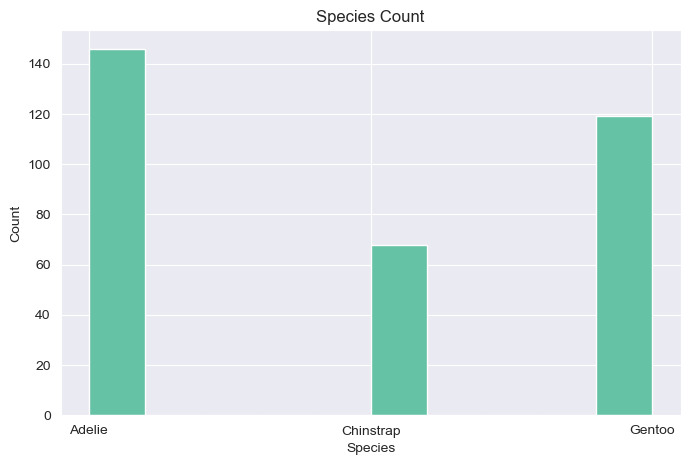

In [125]:
#  Visualize the dataset num_species
plt.figure(figsize=(8, 5))
plt.hist(num_species)
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

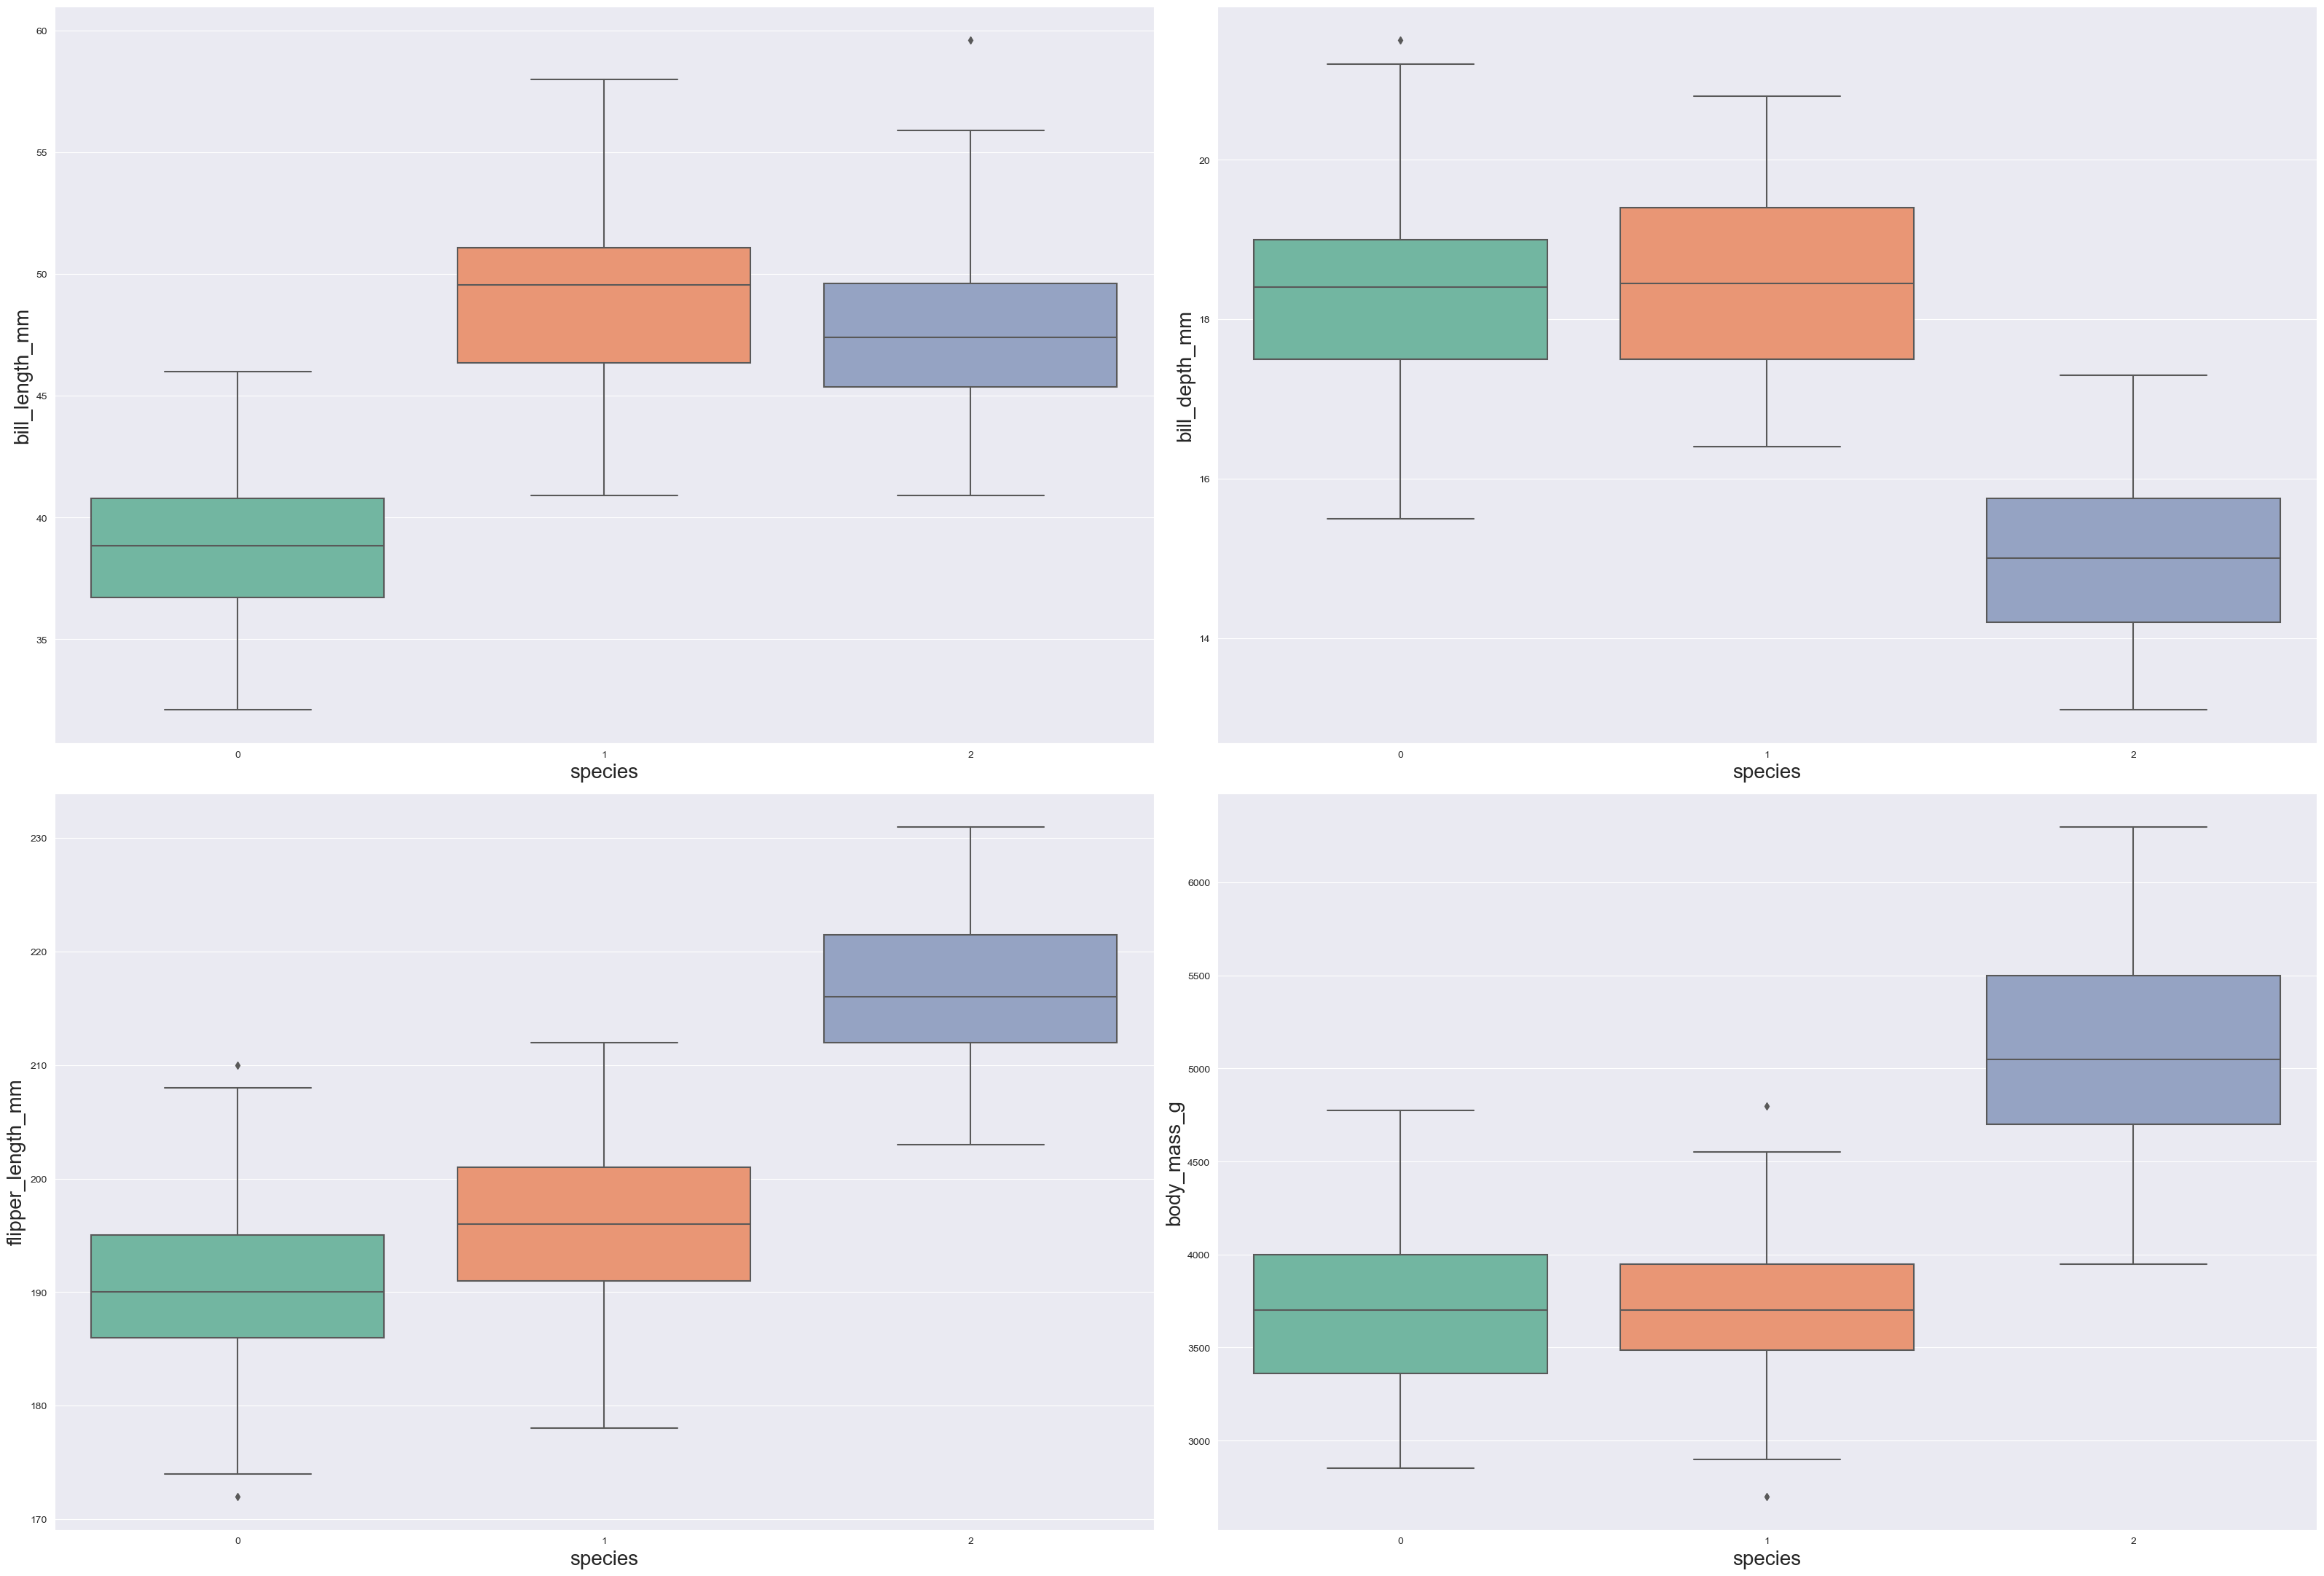

In [126]:
#  Visualize the dataset
data_copy = data.copy()
x =data_copy.pop('species')
data_copy.pop('sex')
data_copy.pop('island')
plt.figure(figsize=(32, 32))

num_cols = 2
num_rows = int(data_copy.shape[1] / num_cols) + 1

for index, col in enumerate(data_copy.columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=data_copy, x=x, y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('species', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

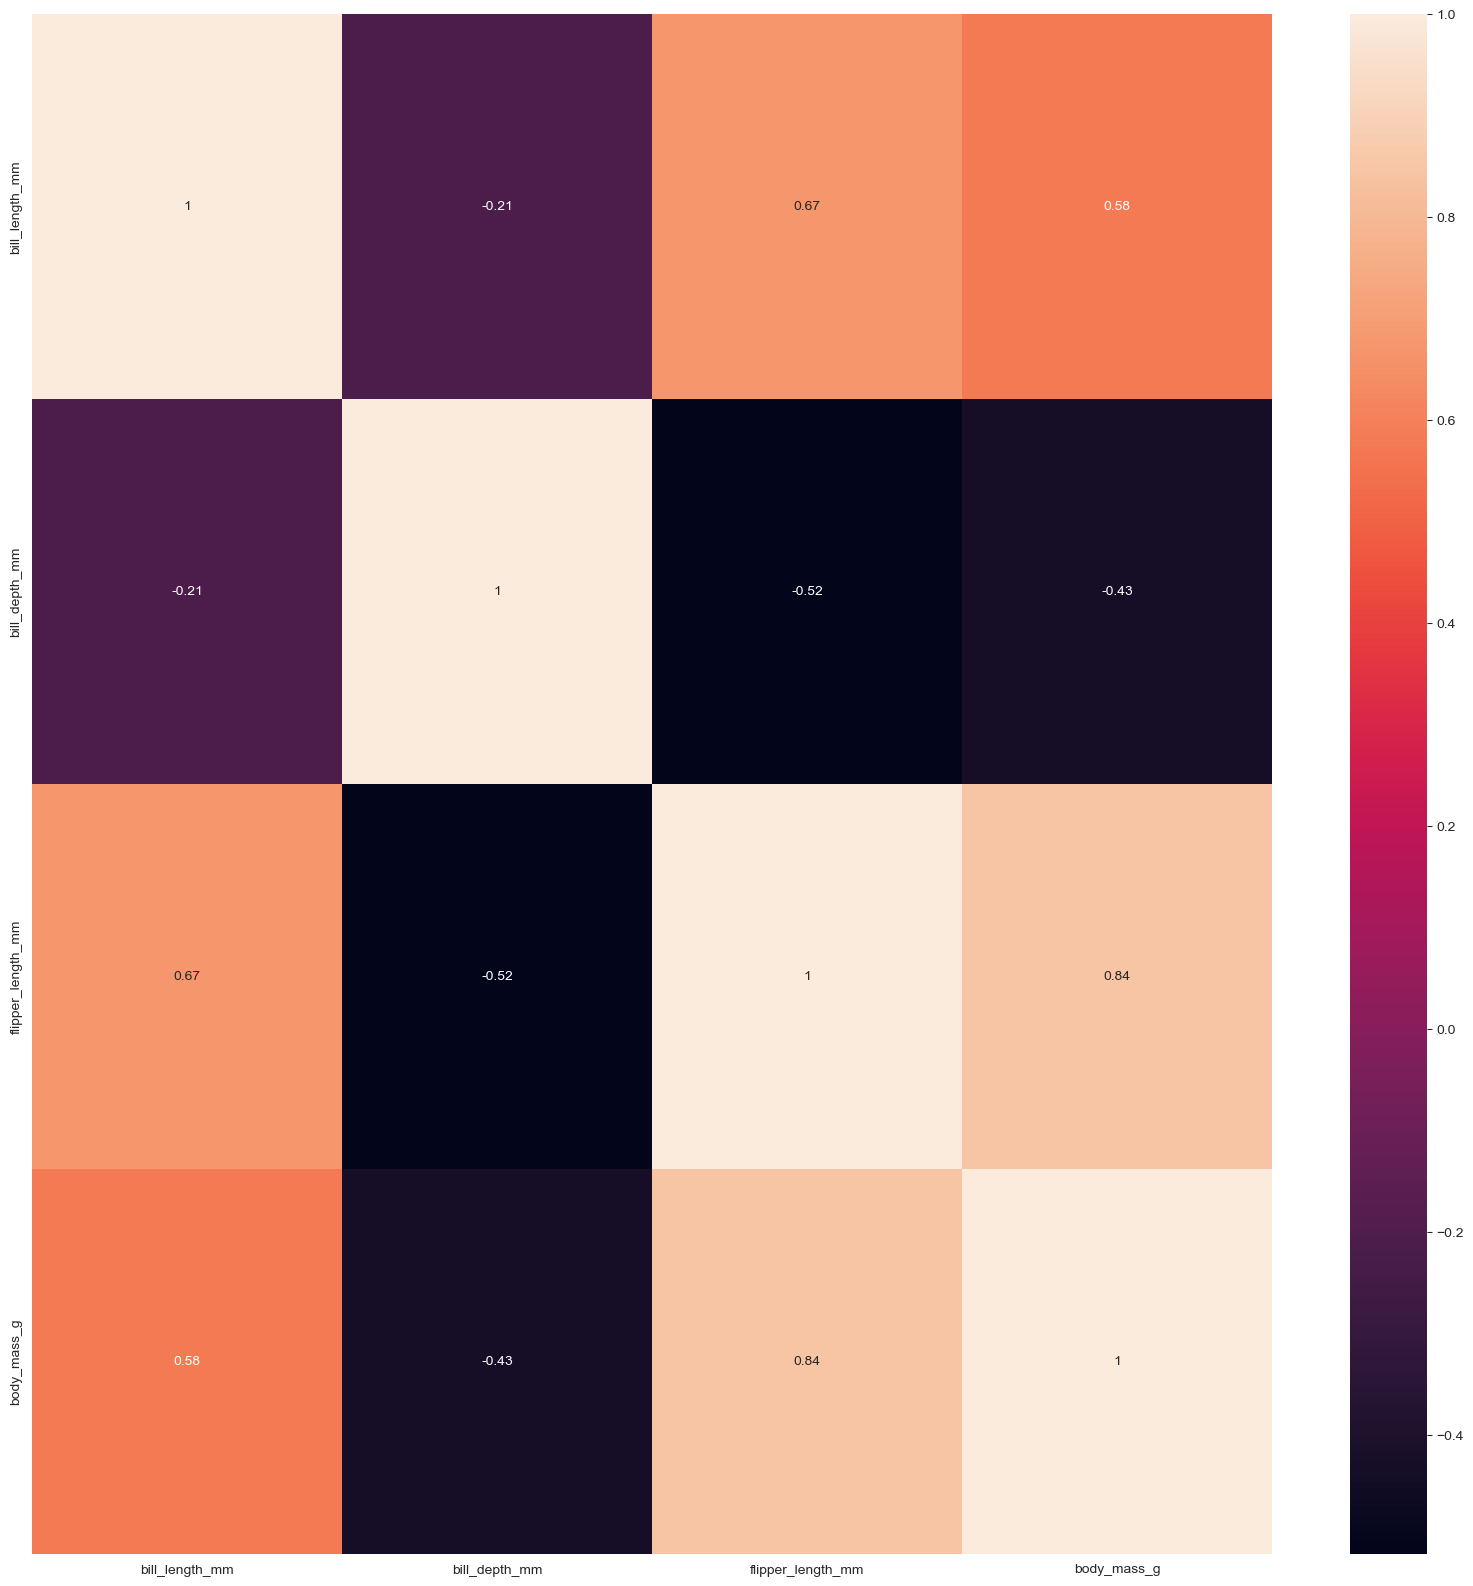

In [127]:
corrmat = data_copy.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [128]:
data_set = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
data_set.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [196]:
y = data['species'].values
X = data.drop(['species'], axis = 1)

In [197]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [198]:
dt_clf = DecisionTreeClassifier(random_state=5)
dt_clf = dt_clf.fit(X_train, y_train)

In [199]:
X.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

[Text(0.578125, 0.9285714285714286, 'flipper_length_mm <= 206.5\ngini = 0.642\nsamples = 266\nvalue = [110, 55, 101]\nclass = Adelie'),
 Text(0.34375, 0.7857142857142857, 'bill_length_mm <= 43.15\ngini = 0.44\nsamples = 159\nvalue = [108, 50, 1]\nclass = Adelie'),
 Text(0.125, 0.6428571428571429, 'bill_length_mm <= 42.35\ngini = 0.054\nsamples = 108\nvalue = [105, 3, 0]\nclass = Adelie'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.5, 'sex <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]\nclass = Adelie'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Chinstrap'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = Adelie'),
 Text(0.5625, 0.6428571428571429, 'island <= 0.5\ngini = 0.147\nsamples = 51\nvalue = [3, 47, 1]\nclass = Chinstrap'),
 Text(0.4375, 0.5, 'bill_length_mm <= 47.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]\nclass = Adelie'),
 Text

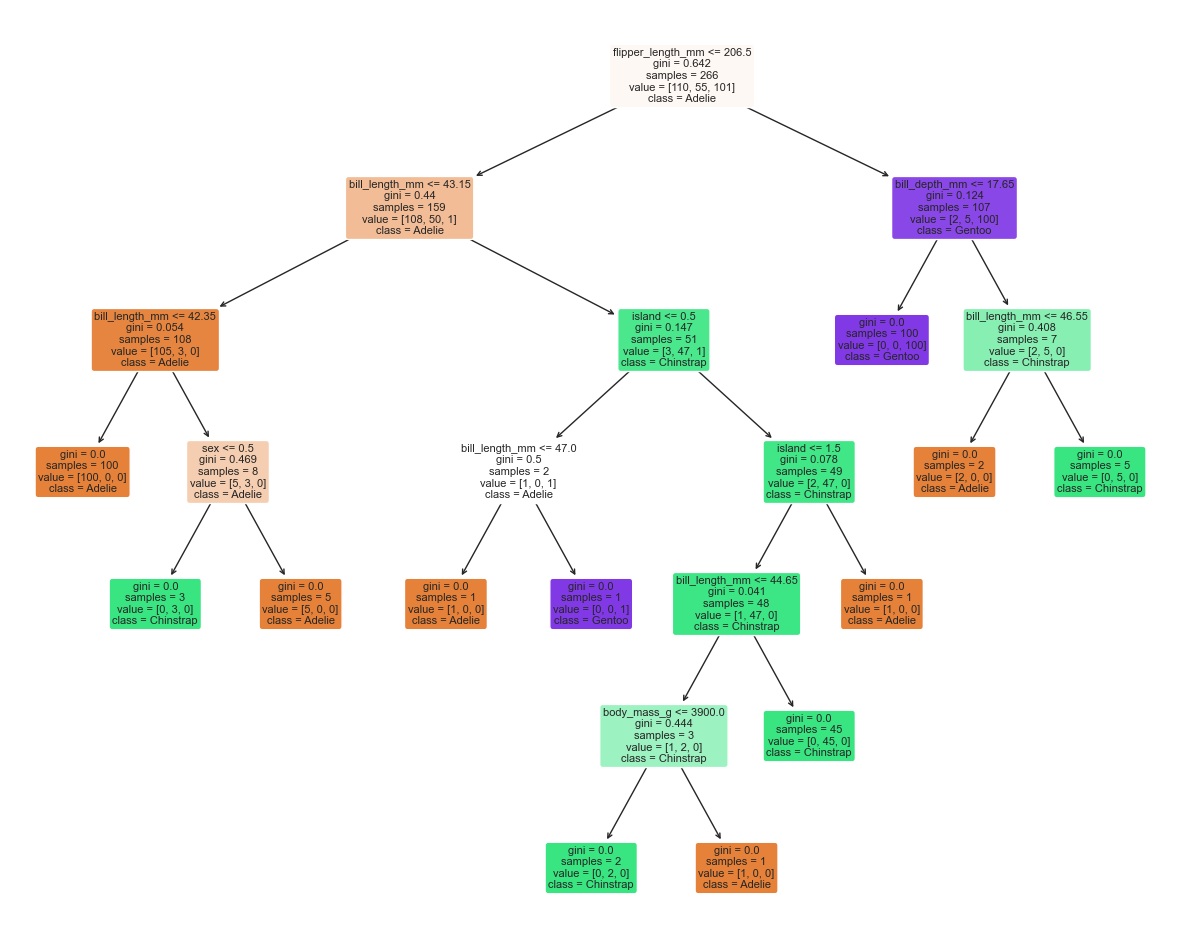

In [200]:
plt.figure(figsize=(15, 12))
plot_tree(dt_clf, 
          filled=True, 
          rounded=True, 
          class_names=['Adelie', 'Chinstrap', 'Gentoo'], 
          feature_names=X.columns.tolist())

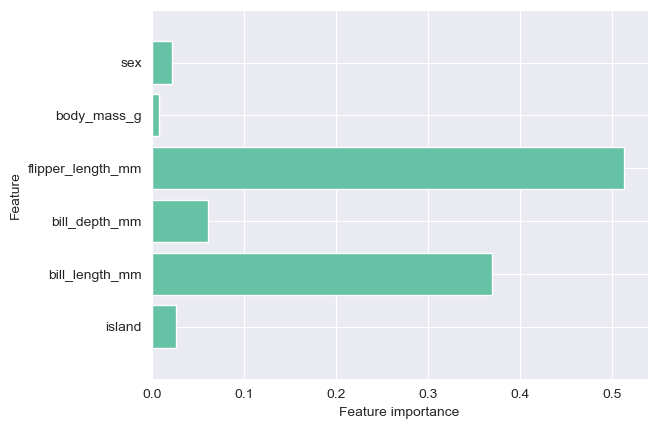

In [201]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(dt_clf)

In [202]:
dt_clf.feature_importances_

array([0.02653479, 0.36977628, 0.06097498, 0.51295021, 0.00780688,
       0.02195686])

## Model Evaluation

In [203]:
y_pred = dt_clf.predict(X_test)

In [204]:
accuracy_score(y_pred, y_test)

0.9850746268656716

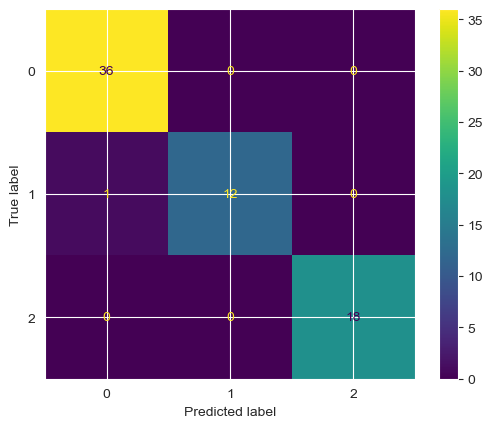

In [205]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_).plot()
plt.show()

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [182]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = dt_clf.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=35, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    clf_dts.append(dt_clf)

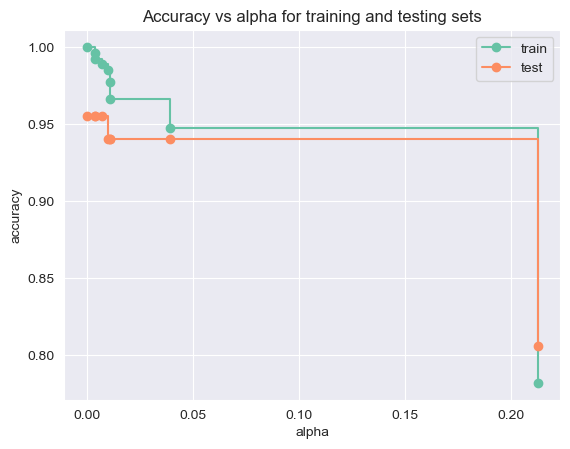

In [183]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in clf_dts]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

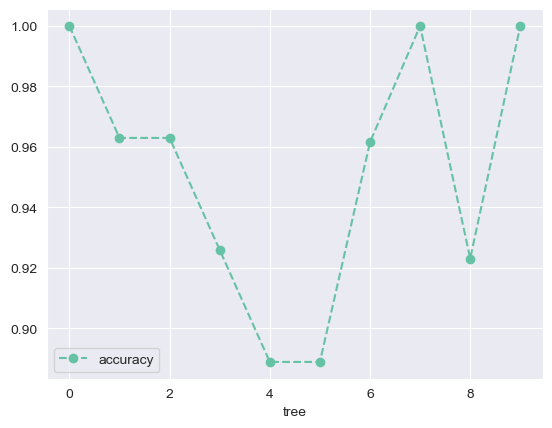

In [184]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0085)

scores = cross_val_score(dt_clf, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

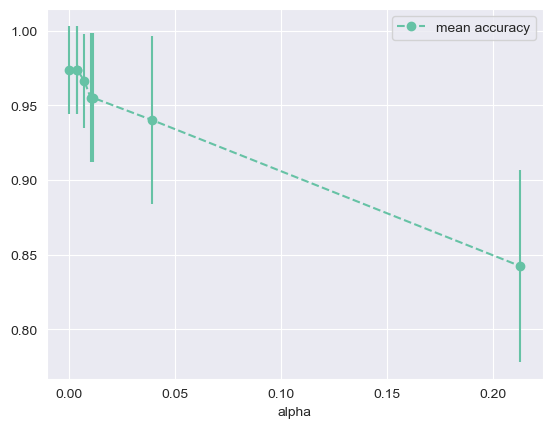

In [185]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [186]:
alpha_results['mean accuracy'].max()

0.9736467236467237

In [187]:
alpha_results['mean accuracy'].idxmax()

0

In [188]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0

In [189]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(0.578125, 0.9285714285714286, 'flipper_length_mm <= 206.5\ngini = 0.642\nsamples = 266\nvalue = [110, 55, 101]\nclass = Adelie'),
 Text(0.34375, 0.7857142857142857, 'bill_length_mm <= 43.15\ngini = 0.44\nsamples = 159\nvalue = [108, 50, 1]\nclass = Adelie'),
 Text(0.125, 0.6428571428571429, 'bill_length_mm <= 42.35\ngini = 0.054\nsamples = 108\nvalue = [105, 3, 0]\nclass = Adelie'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.5, 'bill_depth_mm <= 17.45\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]\nclass = Adelie'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Chinstrap'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = Adelie'),
 Text(0.5625, 0.6428571428571429, 'body_mass_g <= 4575.0\ngini = 0.147\nsamples = 51\nvalue = [3, 47, 1]\nclass = Chinstrap'),
 Text(0.4375, 0.5, 'bill_depth_mm <= 21.15\ngini = 0.078\nsamples = 49\nvalue = [2, 47, 0]\

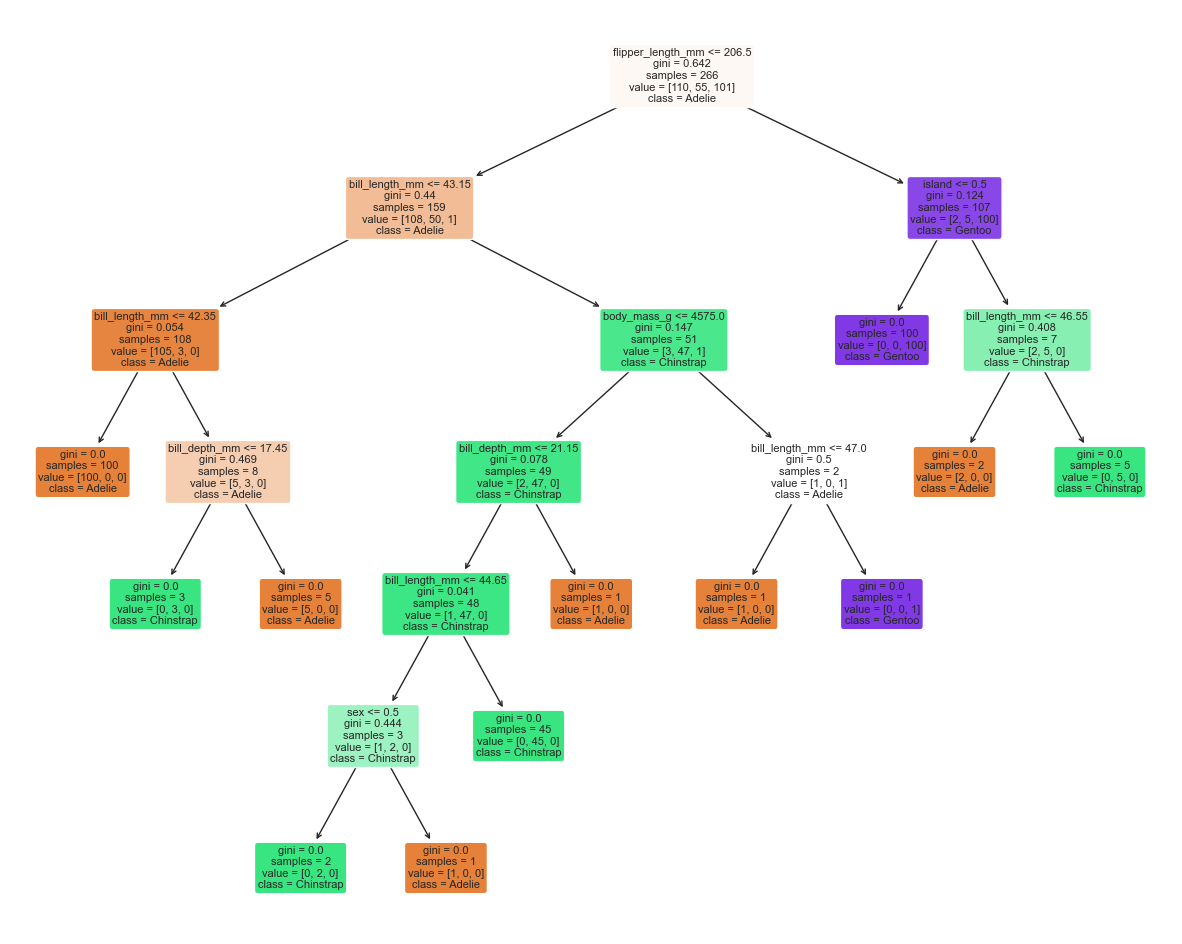

In [157]:
plt.figure(figsize=(15, 12))
plot_tree(dt_clf, 
          filled=True, 
          rounded=True, 
          class_names=['Adelie', 'Chinstrap', 'Gentoo'], 
          feature_names=X.columns.tolist())

In [190]:
y_pred = dt_clf.predict(X_test)

In [191]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0,
       1], dtype=int8)

In [192]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0,
       1], dtype=int8)

In [193]:
accuracy_score(y_pred, y_test)

0.9701492537313433

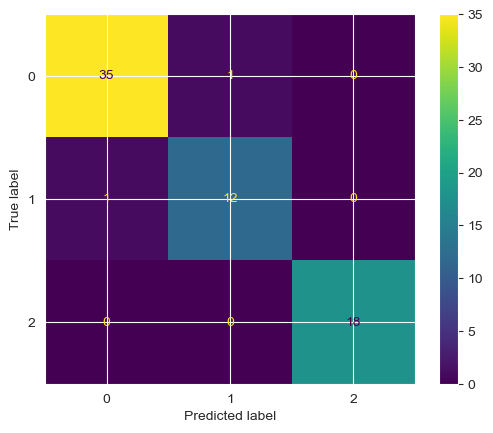

In [194]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_).plot()
plt.show()

In [195]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        18

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



## Classification Using Random Forests

In [164]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
y_pred = clf_rf.predict(X_test)

In [166]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0,
       1], dtype=int8)

In [167]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0,
       1], dtype=int8)

In [168]:
accuracy_score(y_pred, y_test)

0.9850746268656716

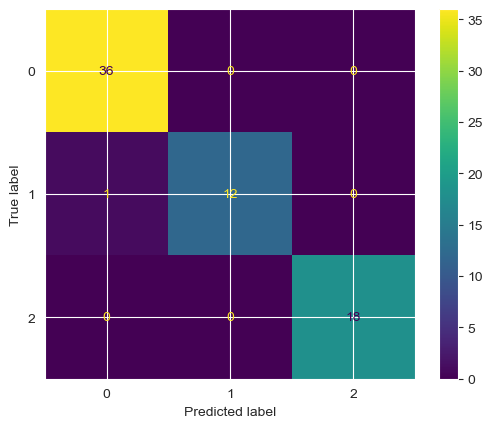

In [170]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_).plot()
plt.show()

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



### Evaluate and discuss the model performance in contrast to the previous models
the classification score for the original model shows that the model performs better the the pruned model. this may be as a result of the volume of data used to train the model

### Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest
In comparism to lab2 (binary logicstic regression model) we see that the  tree and random forest models perform better on  this data set than the logistic regression model.

### Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?
For this case in question, I will pick the random forest model because I feel it has more accurate prediction than the other models and is suitable for multi-class preidcitons.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

???

### Reflections
- It is important to clean your data inorder for the model accurately make predictions.
- In using a decision tree, the important features from the data that the model will make preditions off of should be properly considered so as to make the model very robust.
- This activity also shows the importance of pruning a decision tree in order to make the model more accurate in making decisions.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab3.ipynb** to the **Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection